### Import Libraries

In [ ]:
import numpy as np 
import random  
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ConsolidateOutput.csv')

### Data Cleaning

In [ ]:
data.shape

(2973371, 15)

In [ ]:
# Checking Type of each field 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973371 entries, 0 to 2973370
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   external_author_id  float64
 1   author              object 
 2   content             object 
 3   region              object 
 4   language            object 
 5   publish_date        object 
 6   harvested_date      object 
 7   following           int64  
 8   followers           int64  
 9   updates             int64  
 10  post_type           object 
 11  account_type        object 
 12  new_june_2018       int64  
 13  retweet             int64  
 14  account_category    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 340.3+ MB


In [ ]:
# Checking missing Values
data.isna().sum().sort_values(ascending=False)

post_type             1662425
region                   8843
account_type              363
external_author_id          4
content                     1
account_category            0
retweet                     0
new_june_2018               0
updates                     0
followers                   0
following                   0
harvested_date              0
publish_date                0
language                    0
author                      0
dtype: int64

In [ ]:
# Removing 1 content row
data.dropna(subset = ['content'], inplace=True)
# Again Checking of missing values
data.isna().sum().sort_values(ascending=False)

post_type             1662424
region                   8843
account_type              363
external_author_id          4
account_category            0
retweet                     0
new_june_2018               0
updates                     0
followers                   0
following                   0
harvested_date              0
publish_date                0
language                    0
content                     0
author                      0
dtype: int64

In [ ]:
data.shape

(2973370, 15)

In [ ]:
# Dropping un-necessary Columns
df = data.drop(['external_author_id', 'harvested_date'], axis=1)
df.head()

,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,1052,9636,253,NaN,Right,0,0,RightTroll
1,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,1054,9637,255,RETWEET,Right,0,1,RightTroll
3,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll
4,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll


In [ ]:
# languages of tweets
df.language.value_counts(normalize=True)

English                7.160098e-01
Russian                2.099046e-01
German                 2.931724e-02
Ukrainian              1.323784e-02
Italian                6.139162e-03
Serbian                3.233705e-03
Uzbek                  3.192001e-03
Bulgarian              3.180902e-03
LANGUAGE UNDEFINED     2.799853e-03
Arabic                 2.554341e-03
Macedonian             1.769036e-03
French                 1.537649e-03
Spanish                1.057722e-03
Norwegian              7.573898e-04
Farsi (Persian)        5.666970e-04
Romanian               5.485358e-04
Dutch                  3.924839e-04
Swedish                3.433814e-04
Vietnamese             3.329555e-04
Estonian               2.593017e-04
Japanese               2.576201e-04
Catalan                1.984280e-04
Finnish                1.954012e-04
Albanian               1.923743e-04
Croatian               1.836300e-04
Icelandic              1.678230e-04
Pushto                 1.641235e-04
Portuguese             1.563

In [ ]:
### So 71.6% of tweets are in English, so it's better to remove other languages tweets
# df which contain only english tweets
df = df.loc[df.language == 'English']
print(df.shape)
df.drop(['language'], axis = 1, inplace = True)
df.head()

(2128962, 13)


,author,content,region,publish_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,10/1/2017 19:58,1052,9636,253,NaN,Right,0,0,RightTroll
1,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,10/1/2017 22:50,1054,9637,255,RETWEET,Right,0,1,RightTroll
3,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,10/1/2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll
4,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll


In [ ]:
# Checking the Unique region
df.region.unique()

array(['Unknown', 'United States', 'Italy', nan, 'United Arab Emirates',
       'Israel', 'Azerbaijan', 'United Kingdom', 'Russian Federation',
       'Iraq', 'Germany', 'France', 'Ukraine', 'Serbia', 'Egypt',
       'Hong Kong', 'Belarus', 'Malaysia', 'Afghanistan', 'Mexico',
       'Canada', 'Iran, Islamic Republic of', 'Greece', 'Czech Republic',
       'Finland', 'Latvia', 'Spain', 'Sweden', 'Denmark', 'Switzerland'],
      dtype=object)

In [ ]:
# Region of tweets
df.region.value_counts(normalize=True)

United States                8.692881e-01
Unknown                      1.160504e-01
United Kingdom               7.831501e-03
Azerbaijan                   3.578315e-03
Germany                      6.039053e-04
Russian Federation           5.385802e-04
Italy                        5.287109e-04
Canada                       2.819791e-04
Belarus                      2.321628e-04
Afghanistan                  2.166540e-04
Iraq                         2.157140e-04
Israel                       1.922158e-04
United Arab Emirates         1.743571e-04
Ukraine                      1.085620e-04
Spain                        3.383750e-05
France                       3.148767e-05
Egypt                        2.772795e-05
Sweden                       2.020850e-05
Mexico                       1.926857e-05
Iran, Islamic Republic of    9.399305e-06
Greece                       6.579513e-06
Finland                      3.759722e-06
Malaysia                     1.879861e-06
Latvia                       1.409

In [ ]:
# so, approx. 87% of tweets are from US
#update data to only contain US tweets
df = df.loc[df.region == 'United States']
print(df.shape)
# dropping remaining tweets
df.drop(['region'], axis = 1, inplace = True)
df.head()

(1849686, 12)


,author,content,publish_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
425,1D_NICOLE_,#FoodPoisoning is not a joke! #Walmart #KochFa...,11/26/2015 22:20,48,40,394,RETWEET,Koch,0,1,Fearmonger
426,1D_NICOLE_,Thanks God that #turkey i ate few days ago was...,11/26/2015 22:35,48,40,395,RETWEET,Koch,0,1,Fearmonger
428,1D_NICOLE_,"who's got the worst make up ever, don't tell m...",5/25/2015 12:38,59,51,352,NaN,Koch,0,0,Fearmonger
429,1D_NICOLE_,"I hurt easy, I just don't show it. You can hur...",5/25/2015 12:38,59,51,354,NaN,Koch,0,0,Fearmonger
430,1D_NICOLE_,« The young are permanently in a state resembl...,5/25/2015 12:39,59,51,356,NaN,Koch,0,0,Fearmonger


In [ ]:
#review nan values again
df.isna().sum().sort_values(ascending = False)

post_type           1027093
account_type            354
account_category          0
retweet                   0
new_june_2018             0
updates                   0
followers                 0
following                 0
publish_date              0
content                   0
author                    0
dtype: int64

In [ ]:
df.account_type.unique()

array(['Koch', 'Right', 'left', 'Russian', '?', 'Hashtager', 'Arabic',
       'Commercial', 'local', 'German', 'ZAPOROSHIA', 'news', 'right',
       'Ebola ', nan, 'French'], dtype=object)

There are two different 'Right' and 'right', 'news'and 'News' and so on. Similarly other things also so we also replace:
- 'right' with 'Right'
- 'left' with 'Left'
- '?' with 'Unknown'
- 'local' with 'Local'
- 'news' with 'News'
- 'ZAPOROSHIA' with 'Zaporoshia'

In [ ]:
# Updating Acccount Type
df['account_type'].fillna(value='Unknown', inplace = True)

df['account_type'].replace({'?': 'Unknown', 'right': 'Right', 
                            'left': 'Left', 'news': 'News', 
                           'local': 'Local', 'ZAPOROSHIA': 'Zaporoshia'}, 
                           inplace = True)

df.account_type.unique()

array(['Koch', 'Right', 'Left', 'Russian', 'Unknown', 'Hashtager',
       'Arabic', 'Commercial', 'Local', 'German', 'Zaporoshia', 'News',
       'Ebola ', 'French'], dtype=object)

In [ ]:
df.isna().sum().sort_values(ascending = False)

post_type           1027093
account_category          0
retweet                   0
new_june_2018             0
account_type              0
updates                   0
followers                 0
following                 0
publish_date              0
content                   0
author                    0
dtype: int64

In [ ]:
df.post_type.unique()

array(['RETWEET', nan, 'QUOTE_TWEET'], dtype=object)

In [ ]:
# Replace 'nan' with 'no_action' i.e neither 'retweeted' nor 'quote_tweet'
df['post_type'].fillna(value='NO_ACTION', inplace = True)
df.post_type.unique()

array(['RETWEET', 'NO_ACTION', 'QUOTE_TWEET'], dtype=object)

In [ ]:
df.isna().sum().sort_values(ascending = False)

account_category    0
retweet             0
new_june_2018       0
account_type        0
post_type           0
updates             0
followers           0
following           0
publish_date        0
content             0
author              0
dtype: int64

So, FInally no NaN values are there.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1849686 entries, 425 to 2973153
Data columns (total 11 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   author            object
 1   content           object
 2   publish_date      object
 3   following         int64 
 4   followers         int64 
 5   updates           int64 
 6   post_type         object
 7   account_type      object
 8   new_june_2018     int64 
 9   retweet           int64 
 10  account_category  object
dtypes: int64(5), object(6)
memory usage: 169.3+ MB


In [ ]:
df['publish_date'].head()

425    11/26/2015 22:20
426    11/26/2015 22:35
428     5/25/2015 12:38
429     5/25/2015 12:38
430     5/25/2015 12:39
Name: publish_date, dtype: object

In [ ]:
df['publish_date'] = pd.to_datetime(df['publish_date']).dt.date
df['publish_date'].head()

425    2015-11-26
426    2015-11-26
428    2015-05-25
429    2015-05-25
430    2015-05-25
Name: publish_date, dtype: object

In [ ]:
df.head()

,author,content,publish_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
425,1D_NICOLE_,#FoodPoisoning is not a joke! #Walmart #KochFa...,2015-11-26,48,40,394,RETWEET,Koch,0,1,Fearmonger
426,1D_NICOLE_,Thanks God that #turkey i ate few days ago was...,2015-11-26,48,40,395,RETWEET,Koch,0,1,Fearmonger
428,1D_NICOLE_,"who's got the worst make up ever, don't tell m...",2015-05-25,59,51,352,NO_ACTION,Koch,0,0,Fearmonger
429,1D_NICOLE_,"I hurt easy, I just don't show it. You can hur...",2015-05-25,59,51,354,NO_ACTION,Koch,0,0,Fearmonger
430,1D_NICOLE_,« The young are permanently in a state resembl...,2015-05-25,59,51,356,NO_ACTION,Koch,0,0,Fearmonger


Now, Data is ready for Exploration.

### Data Exploration

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff782f9a6a0>,
      dtype=object)

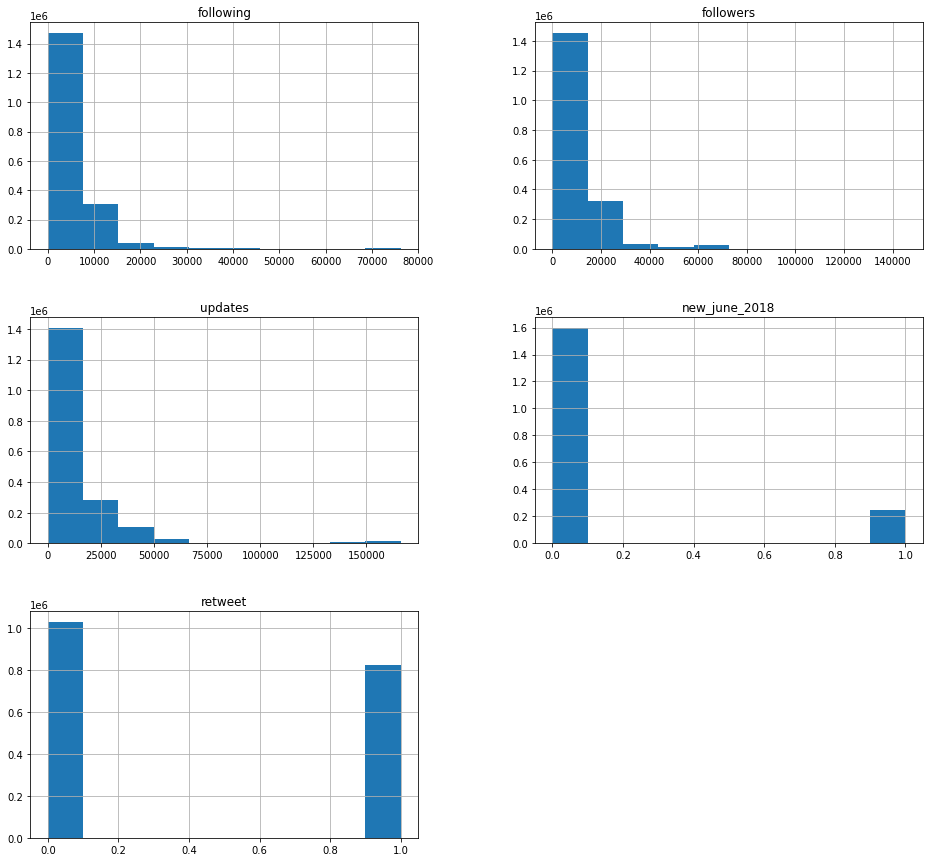

In [ ]:
#histogram of data df
df.hist(figsize=(16,15), bins=10)

**Categorical Feature Exploration**

Text(0.5, 1.0, 'Countplot of Tweets')

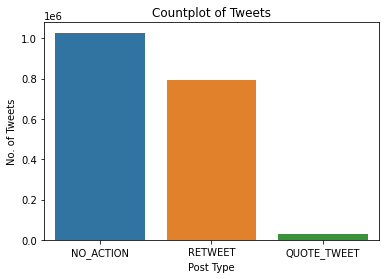

In [ ]:
ax = sns.countplot(df['post_type'], order=df['post_type'].value_counts().index)
ax.set(xlabel = 'Post Type' , ylabel='No. of Tweets')
plt.title("Countplot of Tweets")

Text(0.5, 1.0, 'Counting Different Tweets')

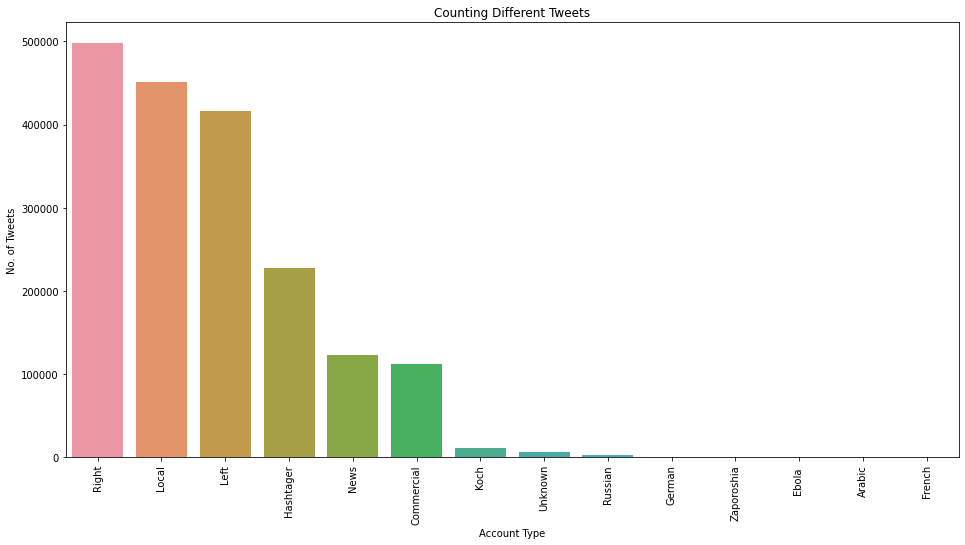

In [ ]:
plt.figure(figsize=(16,8))
ax = sns.countplot(df['account_type'], order=df['account_type'].value_counts().index)
ax.set(xlabel = 'Account Type' , ylabel='No. of Tweets')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Counting Different Tweets")

Text(0.5, 1.0, 'Tweets from Account category')

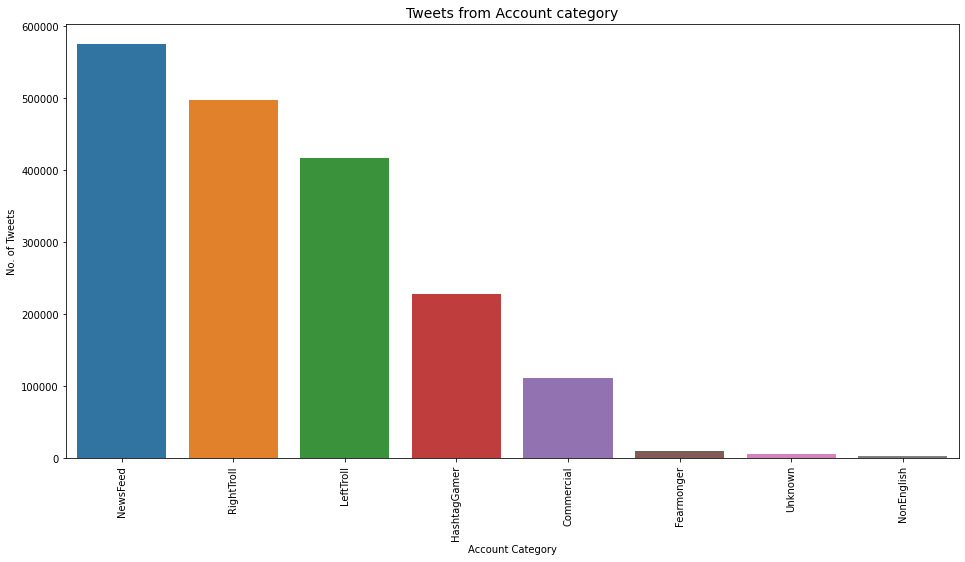

In [ ]:
# countplot of tweets from account_category attribute
plt.figure(figsize=(16,8))
ax = sns.countplot(df['account_category'], order=df['account_category'].value_counts().index)
ax.set(xlabel = 'Account Category' , ylabel='No. of Tweets')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Tweets from Account category", fontsize=14)

Followers and Following Exploration

Text(0, 0.5, 'Number of Following')

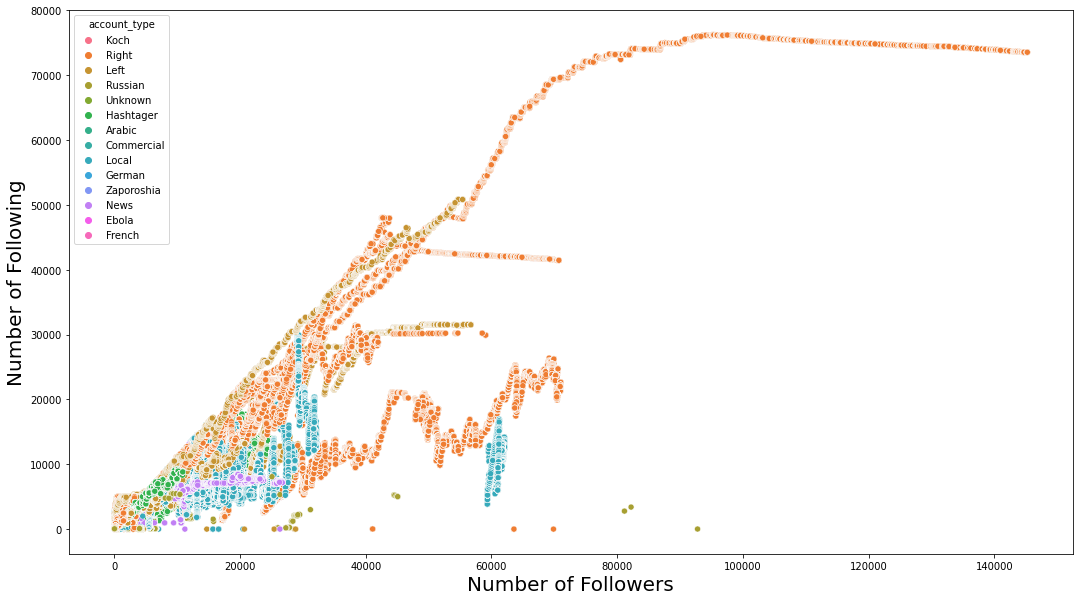

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.scatterplot(x='followers', y='following',hue='account_type' ,data=df)
plt.xlabel('Number of Followers', fontsize = 20)
plt.ylabel('Number of Following', fontsize = 20)

Text(0, 0.5, 'Number of Following')

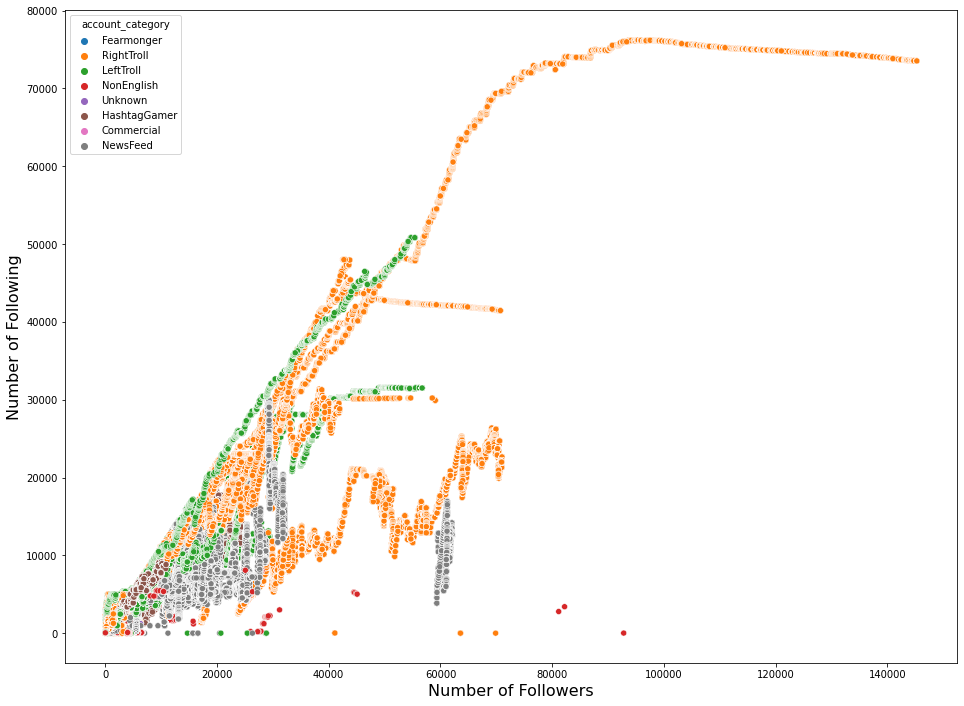

In [ ]:
plt.figure(figsize=(16,12))
ax = sns.scatterplot(x='followers', y='following',hue='account_category' ,data=df)
plt.xlabel('Number of Followers',fontsize=16)
plt.ylabel('Number of Following',fontsize=16)

Text(0, 0.5, 'Number of Following')

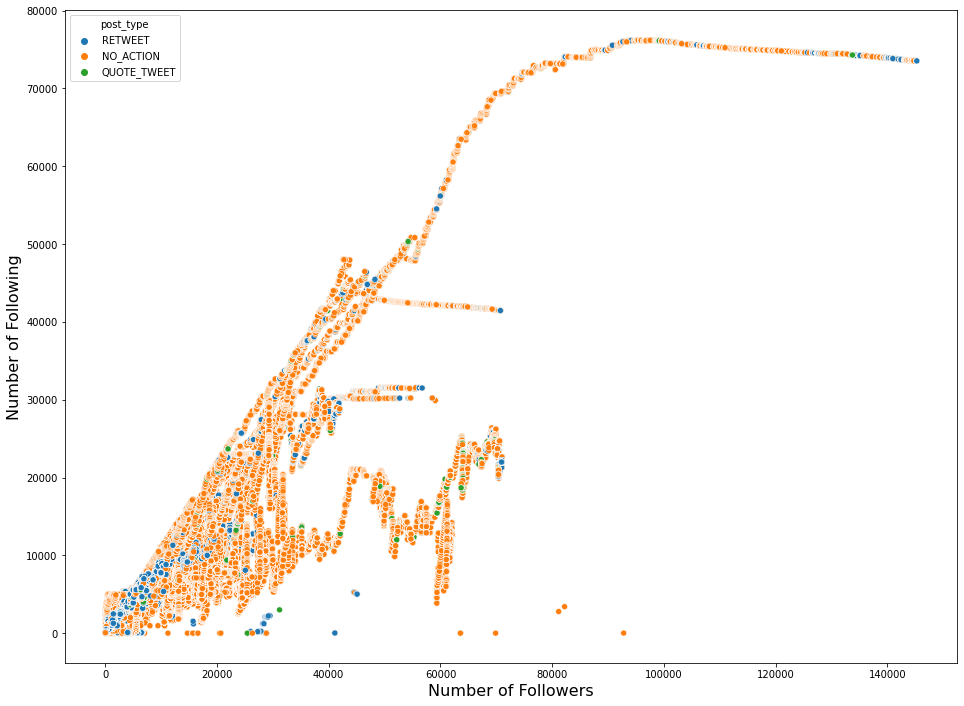

In [ ]:
plt.figure(figsize=(16,12))
ax = sns.scatterplot(x='followers', y='following',hue='post_type' ,data=df)
plt.xlabel('Number of Followers', fontsize = 16)
plt.ylabel('Number of Following', fontsize = 16)

Publish Date Exploration

Text(0, 0.5, 'Tweet Count')

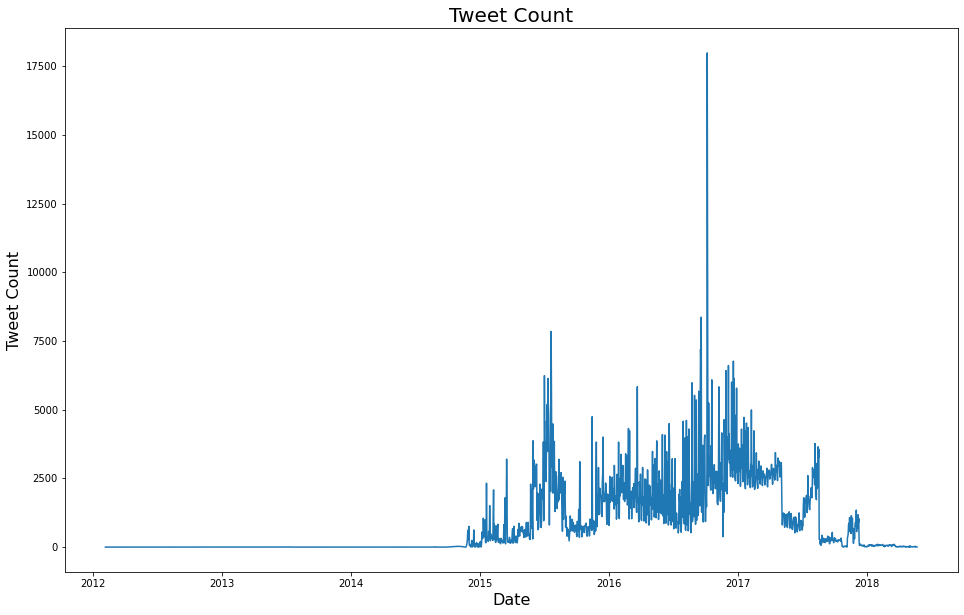

In [ ]:
ax = df['publish_date'].value_counts()
ax.plot(linestyle = "-", figsize = (16,10))
plt.title("Tweet Count", fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Tweet Count', fontsize=16)

### Tokenization Tweets

In [ ]:
df.head()

,author,content,publish_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
425,1D_NICOLE_,#FoodPoisoning is not a joke! #Walmart #KochFa...,2015-11-26,48,40,394,RETWEET,Koch,0,1,Fearmonger
426,1D_NICOLE_,Thanks God that #turkey i ate few days ago was...,2015-11-26,48,40,395,RETWEET,Koch,0,1,Fearmonger
428,1D_NICOLE_,"who's got the worst make up ever, don't tell m...",2015-05-25,59,51,352,NO_ACTION,Koch,0,0,Fearmonger
429,1D_NICOLE_,"I hurt easy, I just don't show it. You can hur...",2015-05-25,59,51,354,NO_ACTION,Koch,0,0,Fearmonger
430,1D_NICOLE_,« The young are permanently in a state resembl...,2015-05-25,59,51,356,NO_ACTION,Koch,0,0,Fearmonger


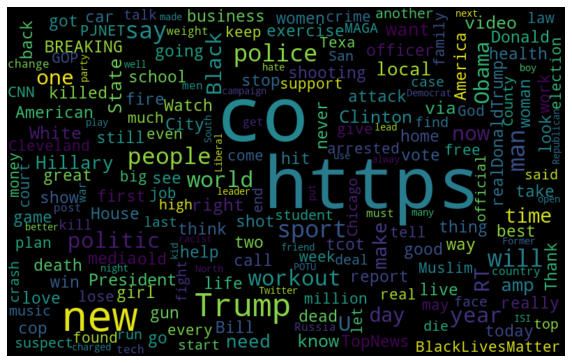

In [ ]:
from wordcloud import WordCloud, STOPWORDS
all_words = ' '.join(df['content'])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800,height=500,
                      max_font_size=110, collocations=False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

'https', 'co' and some other words are also, which we have to remove, so we need to clean this also.

In [ ]:
# Cleaning the content Stuff
df['content'] = df['content'].str.replace(r'http\S+', "")
df['content'] = df['content'].str.replace(r"http", "")
df['content'] = df['content'].str.replace(r"@\S+", "")
df['content'] = df['content'].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
df['content'] = df['content'].str.replace(r"@", "at")
df['content'] = df['content'].str.lower()
df.head()

,author,content,publish_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
425,1D_NICOLE_,foodpoisoning is not a joke! walmart kochfa...,2015-11-26,48,40,394,RETWEET,Koch,0,1,Fearmonger
426,1D_NICOLE_,thanks god that turkey i ate few days ago was...,2015-11-26,48,40,395,RETWEET,Koch,0,1,Fearmonger
428,1D_NICOLE_,"who's got the worst make up ever, don't tell m...",2015-05-25,59,51,352,NO_ACTION,Koch,0,0,Fearmonger
429,1D_NICOLE_,"i hurt easy, i just don't show it you can hur...",2015-05-25,59,51,354,NO_ACTION,Koch,0,0,Fearmonger
430,1D_NICOLE_,the young are permanently in a state resembl...,2015-05-25,59,51,356,NO_ACTION,Koch,0,0,Fearmonger


In [ ]:
df.shape

(1849686, 11)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '...', '``']

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import itertools
from nltk import word_tokenize, FreqDist
def process_content(data):
    tokens = word_tokenize(data)
    stopwords_removed = [token for token in tokens if token not in stopwords_list]
    return stopwords_removed   

df['tokens'] = df['content'].apply(process_content)
df['text'] = df['tokens'].apply(' '.join)

In [ ]:
#Further clean/check
df = df.reset_index()
df.drop(['content'], axis=1, inplace=True)
df.head()

,index,author,publish_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category,tokens,text
0,425,1D_NICOLE_,2015-11-26,48,40,394,RETWEET,Koch,0,1,Fearmonger,"[foodpoisoning, joke, walmart, kochfarms]",foodpoisoning joke walmart kochfarms
1,426,1D_NICOLE_,2015-11-26,48,40,395,RETWEET,Koch,0,1,Fearmonger,"[thanks, god, turkey, ate, days, ago, good, ko...",thanks god turkey ate days ago good kochfarms
2,428,1D_NICOLE_,2015-05-25,59,51,352,NO_ACTION,Koch,0,0,Fearmonger,"['s, got, worst, make, ever, n't, tell, mirror]",'s got worst make ever n't tell mirror
3,429,1D_NICOLE_,2015-05-25,59,51,354,NO_ACTION,Koch,0,0,Fearmonger,"[hurt, easy, n't, show, hurt, someone, even, k...",hurt easy n't show hurt someone even know
4,430,1D_NICOLE_,2015-05-25,59,51,356,NO_ACTION,Koch,0,0,Fearmonger,"[young, permanently, state, resembling, intoxi...",young permanently state resembling intoxicatio...


In [ ]:
## review tokens in more detail
word_tot = [word for tokens in df['tokens'] for word in tokens]
word_unique = set(word_tot)
tweet_len = [len(tokens) for tokens in df['tokens']]

print('{} total words with a vocabulary size of {}'.format(len(word_tot), len(word_unique)))
print('Maximum sentence length is {}'.format(max(tweet_len)))

14951076 total words with a vocabulary size of 265034
Maximum sentence length is 62


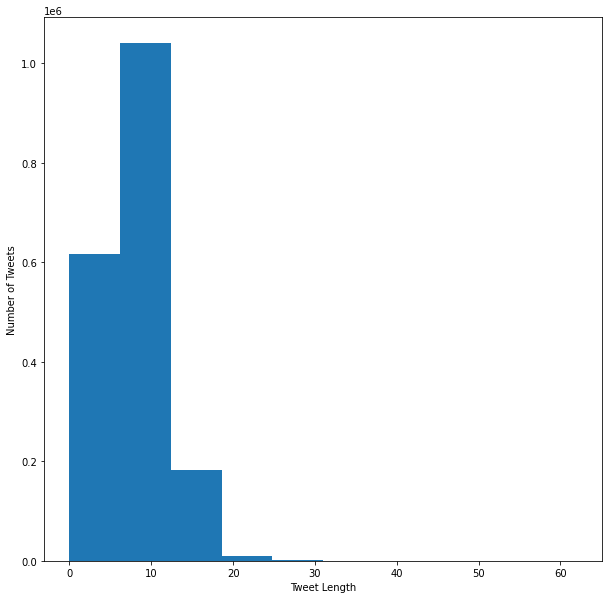

In [ ]:
#Look at histogram of tweet lengths
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Tweet Length')
plt.ylabel('Number of Tweets')
plt.hist(tweet_len)
plt.show()

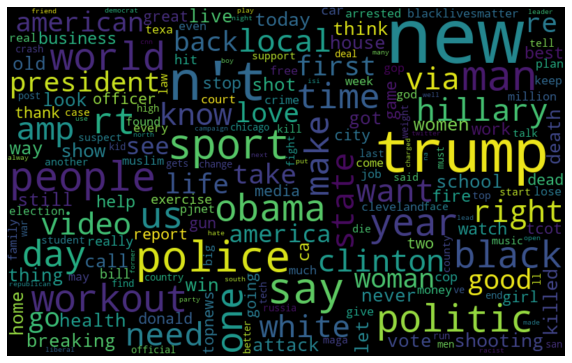

In [ ]:
# join tweets to a single string
all_words = ' '.join(df['text'])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800,height=500,
                      max_font_size=110, collocations=False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Looking at all the data the russian trolls mostly used the following words to target users:

“Trump”,“New”, and “n’t”
I will look at this split by account categories and publish date in more detail below

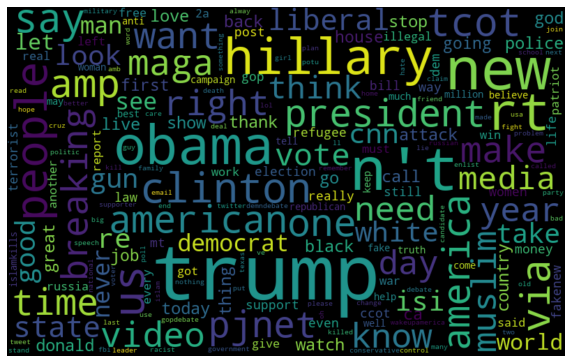

In [ ]:
# join tweets to a single string - Right Trolls
df_right = df.loc[df.account_category == "RightTroll"]
right_words = ' '.join(df_right['text'])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800,height=500,
                      max_font_size=110, collocations=False).generate(right_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Right Trolls mostly used the following words to target users:

“Trump”, “Hillary”, “Obama”, “New”, "People" and “n’t”.<br>
It appears that right trolls focused on Obama and Hillary in their tweets more than Left Trolls did (see below)

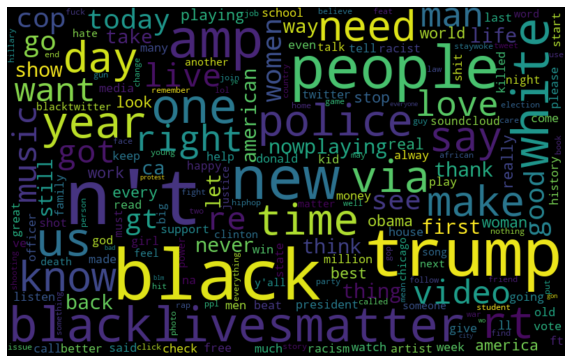

In [ ]:
# join tweets to a single string - Left Trolls
df_left = df.loc[df.account_category == "LeftTroll"]
left_words = ' '.join(df_left['text'])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800,height=500,
                      max_font_size=110, collocations=False).generate(left_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Left Trolls mostly used the following words to target users:

“Trump”, “Black”, “White”, “New”, "People" and “n’t”<br>
It appears that race played a large role for them with the hashtage #blacklivesmatter also largely used

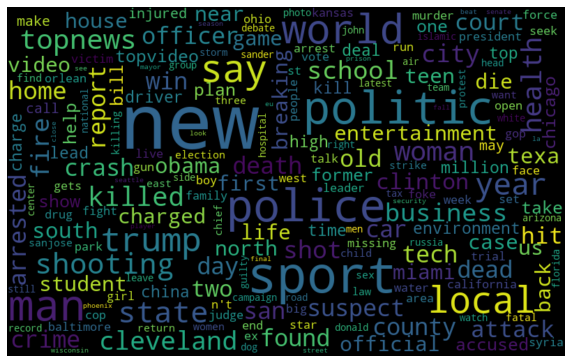

In [ ]:
# join tweets to a single string - News Feed
df_news = df.loc[df.account_category == "NewsFeed"]
news_words = ' '.join(df_news['text'])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800,height=500,
                      max_font_size=110, collocations=False).generate(news_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

News Feed mostly used the following words to target users:

“Sport”, “Politic”, “Police”, “New”, "World", and “Man”<br>
These are common words we hear on the news, which makes sense the News Feed category uses them to target audiences

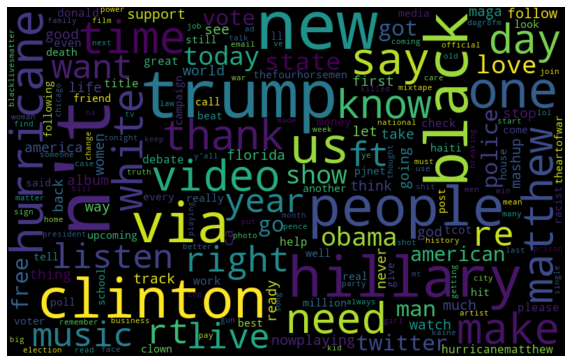

In [ ]:
# join tweets to a single string - 10/6/2016 large spike in tweets
df_2016_10_06 = df.loc[df['publish_date'] == pd.to_datetime('2016-10-06')]
df_100616_words = ' '.join(df_2016_10_06['text'])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800,height=500,
                      max_font_size=110, collocations=False).generate(df_100616_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


"Trump", "Hillary", "Black", "New", "People" and "n't"<br>
are most used words in tweets

In [ ]:
#Update dataframe for modeling
clean_data = df.drop(['index','author', 'publish_date', 
                      'following', 'followers', 'updates', 'account_type', 
                      'new_june_2018', 'retweet', 'post_type'], axis=1)
clean_data.head()

,account_category,tokens,text
0,Fearmonger,"[foodpoisoning, joke, walmart, kochfarms]",foodpoisoning joke walmart kochfarms
1,Fearmonger,"[thanks, god, turkey, ate, days, ago, good, ko...",thanks god turkey ate days ago good kochfarms
2,Fearmonger,"['s, got, worst, make, ever, n't, tell, mirror]",'s got worst make ever n't tell mirror
3,Fearmonger,"[hurt, easy, n't, show, hurt, someone, even, k...",hurt easy n't show hurt someone even know
4,Fearmonger,"[young, permanently, state, resembling, intoxi...",young permanently state resembling intoxicatio...


In [ ]:
print(len(clean_data))

1849686


In [ ]:
clean_data.account_category.value_counts(normalize=True)

NewsFeed        0.310698
RightTroll      0.269205
LeftTroll       0.225040
HashtagGamer    0.123320
Commercial      0.060578
Fearmonger      0.005903
Unknown         0.003333
NonEnglish      0.001922
Name: account_category, dtype: float64

When modeling the data I've decided to combine HashtagGamer, Commercial, Fearmonger, Unknown and NonEnglish into 'Other' since they haven't been prominant in the exploratory phase when looking at the number of followers/following or the largest tweet dates (publish_dates).

In [ ]:
#renaming account_categories
clean_data['account_category'].replace({'HashtagGamer': 'Other','NonEnglish': 'Other', 'Unknown': 'Other', 
                            'Fearmonger': 'Other', 'Commercial': 'Other'}, inplace = True)
print(clean_data.shape)
clean_data.account_category.value_counts(normalize=True)

(1849686, 3)


NewsFeed      0.310698
RightTroll    0.269205
LeftTroll     0.225040
Other         0.195057
Name: account_category, dtype: float64

Now that I have the final data for analysis, on to feature engineering and modeling!

### Feature Engineering & Modeling

#### Word2Vec

In [ ]:
#Define X and y
from sklearn.model_selection import train_test_split

X = np.array(clean_data.tokens)
y = np.array(clean_data.account_category)

#Create Train/Validate/Test data splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=40)

In [ ]:
import gensim
#labelize tweets
from tqdm import tqdm
LabeledSentence = gensim.models.doc2vec.LabeledSentence
tqdm.pandas(desc="progress-bar") #estimate time to completion

def labelizeTweets(tweets, label_type):
    labelized = []
    for i,v in tqdm(enumerate(tweets)):
        label = '%s_%s'%(label_type,i)
        labelized.append(LabeledSentence(v, [label]))
    return labelized

#split labelized tweets by train/test/split data
X_train = labelizeTweets(X_train, 'TRAIN')
X_val = labelizeTweets(X_val, 'VALIDATE')
X_test = labelizeTweets(X_test, 'TEST')

In [ ]:
#Check the first element of the labelized trained data to make sure it worked
X_train[0]

Now each element is an object with two attributes: a list of tokens and a label. The next step is to build and train my Word2Vec model

Build the word2vec model from x_train i.e. the corpus.

In [ ]:
#Build the Word2Vec Model
import gensim
from gensim.models.word2vec import Word2Vec

tweet_w2v = Word2Vec(size=200, window = 5, min_count=10, workers=4) #initialize model
tweet_w2v.build_vocab([x.words for x in tqdm(X_train)]) #create vocabulary
tweet_w2v.train([x.words for x in tqdm(X_train)], total_examples=tweet_w2v.corpus_count, epochs=2) #train model

In [ ]:
#Check that the Word2Vec code worked correctly 
tweet_w2v['happy']

In [ ]:
#example producing the most similar words
tweet_w2v.most_similar('happy')

## Train/Validate/Split Data for Modelin

In order to classify the tweets, I'll need to turn them into vectors. I know the vector representation of each word within a tweet so I'll have to combine the vectors to get a new vector that represents the whole tweet. I've looked at different methods and it appears the best solution is to compute a weighted average, the weight being the tf-idf score. The weight will provide the importance of the word with respect to the entire corpus.

In [ ]:
# Create tf-idf matrix
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=10)
matrix = vectorizer.fit_transform([x.words for x in X_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print('vocab size :', len(tfidf))

In [ ]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += tweet_w2v[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec

Convert X_train, X_val and X_test into list of vectors. Scale each column to have zero mean and unit standard deviation.

In [ ]:
#Convert into vector and scale
from sklearn.preprocessing import scale
train_vecs_w2v = np.concatenate([buildWordVector(z, 200) for z in tqdm(map(lambda x: x.words, X_train))])
train_vecs_w2v = scale(train_vecs_w2v)

val_vecs_w2v = np.concatenate([buildWordVector(z, 200) for z in tqdm(map(lambda x: x.words, X_val))])
val_vecs_w2v = scale(val_vecs_w2v)

test_vecs_w2v = np.concatenate([buildWordVector(z, 200) for z in tqdm(map(lambda x: x.words, X_test))])
test_vecs_w2v = scale(test_vecs_w2v)

## Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier =  RandomForestClassifier(n_estimators=50, verbose=True)

In [ ]:
classifier.fit(train_vecs_w2v, y_train)

In [ ]:
y_pred_rf = classifier.predict(val_vecs_w2v)

In [ ]:
#Define a function to get metrics
def get_metrics(y_val, y_pred):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_val, y_pred, pos_label=None, average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_val, y_pred, pos_label=None,average='weighted')
    # harmonic mean of precision and recall
    f1 = f1_score(y_val, y_pred, pos_label=None, average='weighted')
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy, precision, recall, f1

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_rf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

In [ ]:
#Plot confusion matrix for random forest model
class_names = list(set(y))
cm = confusion_matrix(y_val, y_pred_rf)
sns.heatmap(data=cm, annot=True)
print(cm)

In [ ]:
report = classification_report(y_val, y_pred_rf)

In [ ]:
print(report)